In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
import os

# TODO: Fill in the Google Drive path where you uploaded the project folder
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'DeepfakeDetectionModel'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Dataset', 'Code', 'Models', 'resnet34_train.ipynb', 'resnet50_train.ipynb', 'resnet101_train.ipynb', 'resnet152_train.ipynb']


In [15]:
MODELS_FOLDER = os.path.join(GOOGLE_DRIVE_PATH, 'Models')
DATASET_FOLDER = os.path.join(GOOGLE_DRIVE_PATH, 'Dataset', 'Dataset_Cropped')
CODE_FOLDER = os.path.join(GOOGLE_DRIVE_PATH, 'Code')
print(os.listdir(MODELS_FOLDER))
print(os.listdir(DATASET_FOLDER))
print(os.listdir(CODE_FOLDER))

['resnet34', 'resnet50', 'resnet101', 'resnet152']
['.DS_Store', 'train', 'test']
['resnet34.py', '__pycache__', 'calculate_mean_std.py', 'resnet50.py', 'resnet152.py', 'resnet101.py']


In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import sys
sys.path.append(CODE_FOLDER)

In [18]:
from calculate_mean_std import calculate_mean_std

In [19]:
test_dataset_path = os.path.join(DATASET_FOLDER, 'test')

In [20]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
resnet34 = tf.keras.models.load_model(os.path.join(MODELS_FOLDER, 'resnet34'))
#plot_model(resnet34, show_shapes=True, show_layer_names=True)
#resnet34.summary()

resnet50 = tf.keras.models.load_model(os.path.join(MODELS_FOLDER, 'resnet50'))
#plot_model(resnet50, show_shapes=True, show_layer_names=True)
#resnet50.summary()

resnet101 = tf.keras.models.load_model(os.path.join(MODELS_FOLDER, 'resnet101'))
#plot_model(resnet101, show_shapes=True, show_layer_names=True)
#resnet101.summary()

resnet152 = tf.keras.models.load_model(os.path.join(MODELS_FOLDER, 'resnet152'))
#plot_model(resnet152, show_shapes=True, show_layer_names=True)
#resnet152.summary()

In [22]:
stats_transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
])

stats_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=stats_transform)

stats_loader = DataLoader(stats_dataset, batch_size=4, shuffle=True, num_workers=2)

calc_mean, calc_std = calculate_mean_std(stats_loader)

print(f'Mean: {calc_mean}')
print(f'Std: {calc_std}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Mean: tensor([0.5764, 0.4331, 0.3886])
Std: tensor([0.2170, 0.1732, 0.1617])


In [23]:
transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=calc_mean, std=calc_std),
])

test_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=transform)

In [26]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dataset_path)

Found 308 files belonging to 3 classes.


In [31]:
model_names = [resnet34, resnet50, resnet101, resnet152]
model_strings = ['ResNet34', 'ResNet50', 'ResNet101', 'ResNet152']

results = {}

for model_name, model_string in zip(model_names, model_strings):
  model = model_name

  loss, accuracy = model.evaluate(test_dataset)

  results[model_string] = {'loss': loss, 'accuracy': accuracy}

10/10 [==============================] - 249s 25s/step - loss: 1.6269 - accuracy: 0.6331


In [32]:
print(results)

{'ResNet34': {'loss': 2.426358222961426, 'accuracy': 0.548701286315918}, 'ResNet50': {'loss': 1.9892832040786743, 'accuracy': 0.5876623392105103}, 'ResNet101': {'loss': 1.9588333368301392, 'accuracy': 0.6136363744735718}, 'ResNet152': {'loss': 1.6268635988235474, 'accuracy': 0.6331169009208679}}


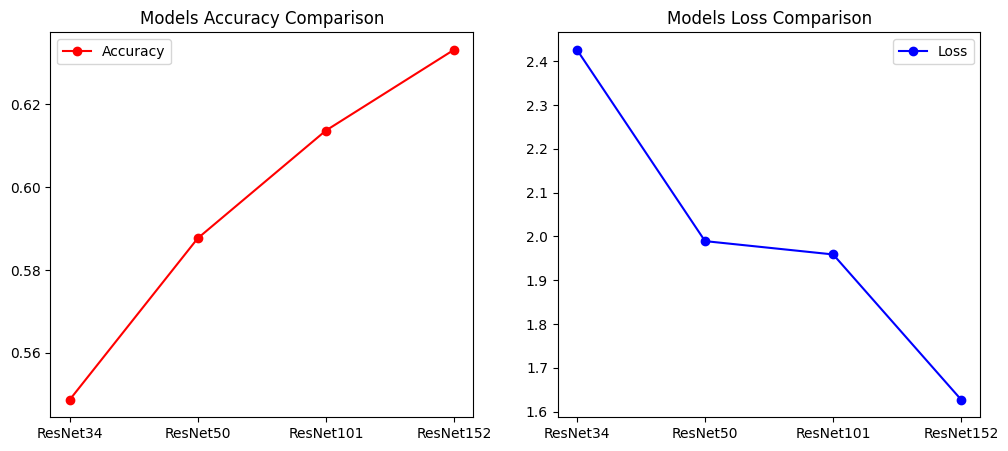

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model_strings, [results[name]['accuracy'] for name in model_strings], 'ro-', label='Accuracy')
plt.title('Models Accuracy Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_strings, [results[name]['loss'] for name in model_strings], 'bo-', label='Loss')
plt.title('Models Loss Comparison')
plt.legend()

plt.show()